# **Advanced Fraud Detection with Anomaly Detection**
This project focuses on enhancing the sensitivity and accuracy of fraud detection systems by combining supervised learning and anomaly detection techniques. The goal is to identify both known and novel fraud patterns, ensuring that financial institutions can detect fraudulent activities more effectively and reduce losses.

## **Objectives**
1. **Improve Fraud Detection:** Enhance the existing fraud detection system by incorporating advanced anomaly detection techniques.

2. **Identify Novel Fraud Patterns:** Use unsupervised learning methods to detect rare or previously unseen fraud patterns.

3. **Minimise False Positives:** Ensure the system accurately identifies fraudulent transactions while minimising false alarms.

4. **Deploy the Model:**: Create a real-time fraud detection system using FastAPI for deployment.

## **Tools and Technologies**
**Python Libraries:** 
- pandas, numpy: Data manipulation and preprocessing.
- scikit-learn: Machine learning models and evaluation metrics.
- tensorflow, keras: Deep learning models (if required).
- matplotlib, seaborn: Data visualisation.
- joblib: Saving and loading trained models.
- fastapi, uvicorn: Deployment of the model as a REST API.

**Version Control:** GitHub for collaboration and version control.

## **Dataset**
The dataset used in this project contains credit card transactions, with the following features:
- **V1-V28:** Anonymized features representing transaction details.
- **Amount:** The transaction amount.
- **Class:** The target variable (0 for non-fraudulent, 1 for fraudulent).

## **Key Steps in the Project**

### 1. **Import Libraries and Data Collection**
- Import the necessary libraries and load the dataset containing historical credit card transactions.
- Ensure the dataset is correctly imported and ready for preprocessing.
- Address any potential file format or loading issues and inspect the data for immediate problems.

### 2. **Load and Preprocess Dataset**
- Handle missing values.
- Encode categorical variables (if any).
- Normalise numerical features using StandardScaler or MinMaxScaler.
- Split the dataset into training and testing sets.

### 3. **Model Selection**
Use a combination of traditional machine learning models and anomaly detection techniques:

- **Supervised Learning Models**:
  - Logistic Regression
  - Decision Tree Classifier
  - Random Forest Classifier

- **Anomaly Detection Models**:
  - Isolation Forest
  - One-Class SVM
  - Autoencoder Model

### 4. **Train Fraud Detection Model (Supervised Learning)**
- Train supervised learning models using labeled data to predict fraudulent transactions.
- Evaluate the models on their ability to classify transactions as either fraudulent or non-fraudulent.

### 5. **Train Anomaly Detection Model**
- Train anomaly detection models to identify outliers or anomalous data points that could represent fraudulent transactions.
- These models are particularly useful for detecting novel fraud patterns not represented in the training data.

### 7. **Ensemble Learning**
- Combine predictions from supervised and anomaly detection models using techniques like majority voting or weighted averaging.
- Improve the robustness and accuracy of the fraud detection system.

### 8. **Evaluation Metrics**
We evaluate the performance of the models using common classification metrics:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC
These metrics help us assess the model's ability to correctly identify fraudulent transactions while minimising false positives.

### 9. **Save Trained Models**
- Serialise the trained models using joblib or pickle for future use.
- Ensure the models can be easily reloaded for inference without retraining.

### 10. **Deployment**
- Deploy the trained models using FastAPI to create a REST API.
- The API receives incoming transaction data and returns predictions on whether each transaction is fraudulent.
- Enable real-time fraud detection for financial institutions.

### 11. **Test FastAPI Application**
- Test the deployed API by sending sample transaction data.
- Verify that the API correctly classifies transactions as fraudulent or non-fraudulent.
- Monitor the application for performance issues or errors during prediction.

---

This project demonstrates how to combine traditional machine learning models with anomaly detection techniques to create an advanced fraud detection system. By leveraging both supervised learning and unsupervised methods, we can effectively detect known and unknown fraudulent activity, helping to minimise financial losses and improve security in financial transactions.

### **Step 1: Import Libraries and Data Collection**

In [ ]:
# -------------------------- Import Libraries --------------------------

# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest, AdaBoostClassifier, StackingClassifier
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Importing TensorFlow/Keras libraries for anomaly detection using Autoencoders
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import necessary library for plotting
import networkx as nx

# Import joblib for saving and loading models
import joblib

# Set style for data visualization
sns.set(style="whitegrid")

# Print confirmation that dependencies are imported
print("All dependencies are imported successfully")

All dependencies are imported successfully


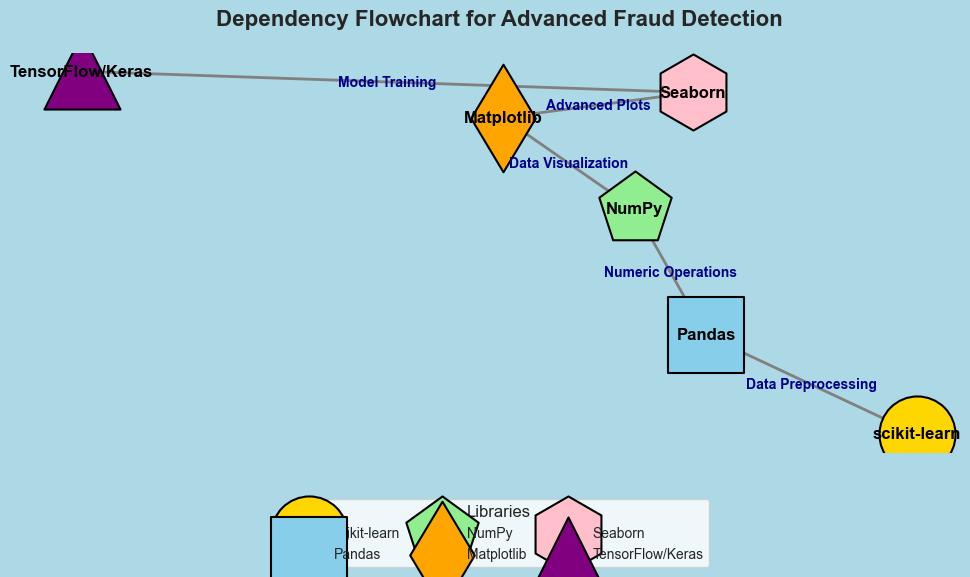

In [2]:
# -------------------------- Flowchart to illustrate the dependencies --------------------------

# Create a directed graph
G = nx.DiGraph()

# Define nodes and their properties
nodes = {
    "scikit-learn": {"color": "gold", "shape": "o", "size": 3000},
    "Pandas": {"color": "skyblue", "shape": "s", "size": 3000},
    "NumPy": {"color": "lightgreen", "shape": "p", "size": 3000},
    "Matplotlib": {"color": "orange", "shape": "d", "size": 3000},
    "Seaborn": {"color": "pink", "shape": "h", "size": 3000},
    "TensorFlow/Keras": {"color": "purple", "shape": "^", "size": 3000}
}

# Define edges with labels
edges = [
    ("scikit-learn", "Pandas", "Data Preprocessing"),
    ("Pandas", "NumPy", "Numeric Operations"),
    ("NumPy", "Matplotlib", "Data Visualization"),
    ("Matplotlib", "Seaborn", "Advanced Plots"),
    ("Seaborn", "TensorFlow/Keras", "Model Training")
]

# Add nodes and edges to the graph
for node, attr in nodes.items():
    G.add_node(node, color=attr["color"], shape=attr["shape"], size=attr["size"])

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

# Get positions for nodes using a spring layout
pos = nx.spring_layout(G, seed=42)  # Layout for consistency

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Draw nodes with colors and shapes
for node, (x, y) in pos.items():
    attr = nodes[node]
    plt.scatter(
        x, y, s=attr["size"], color=attr["color"], label=node, zorder=2,
        edgecolors="black", linewidths=1.5, marker=attr["shape"]
    )
    plt.text(x, y, node, ha="center", va="center", fontsize=12, color="black", fontweight="bold")

# Draw edges with labels
for edge in edges:
    start, end, label = edge
    x1, y1 = pos[start]
    x2, y2 = pos[end]
    plt.plot([x1, x2], [y1, y2], color="gray", zorder=1, linestyle="-", linewidth=2)
    plt.text(
        (x1 + x2) / 2, (y1 + y2) / 2, label, color="darkblue", fontsize=10, ha="center", va="center", fontweight="bold"
    )

# Customise the plot
plt.title("Dependency Flowchart for Advanced Fraud Detection", fontsize=16, fontweight="bold", pad=20)
plt.axis("off")  # Turn off the axis
plt.legend(loc="upper center", ncol=3, fontsize=10, bbox_to_anchor=(0.5, -0.1), title="Libraries")
plt.gcf().set_facecolor("lightblue")  # Set background color
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### **Step 2: Load and Preprocess Dataset**

In [6]:
# -------------------------- Loading the Dataset --------------------------

# Define the file path to the dataset
file_path = r"C:\Users\USER\Downloads\Advanced-Fraud-Detection-with-Anomaly-Detection\creditcard.csv"  # Raw string for Windows path

try:
    data = pd.read_csv(file_path)
    print("Dataset loaded successfully")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Handle missing values (if any)
data.fillna(0, inplace=True)
print("\nMissing values after handling:")
print(data.isnull().sum())

Dataset loaded successfully

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.13745

In [9]:
# -------------------------- Dataset Summary --------------------------

# Get a summary of the dataset including column names and data types
print("\nSummary of the dataset:")
data.info()

# Display basic statistical details about the dataset
print("\nStatistical summary of the dataset:")
print(data.describe())

# Check the distribution of the target variable (fraud detection, 'Class' column)
print("\nClass distribution (fraudulent or non-fraudulent transactions):")
class_distribution = data['Class'].value_counts()
print(class_distribution)

# Check for any data type inconsistencies (numeric data stored as object)
print("\nChecking data types of each column:")
print(data.dtypes)

# Check for duplicate rows in the dataset
print("\nNumber of duplicate rows in the dataset:")
print(data.duplicated().sum())

# Check for unique values in each column
print("\nNumber of unique values in each column:")
print(data.nunique())


Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null

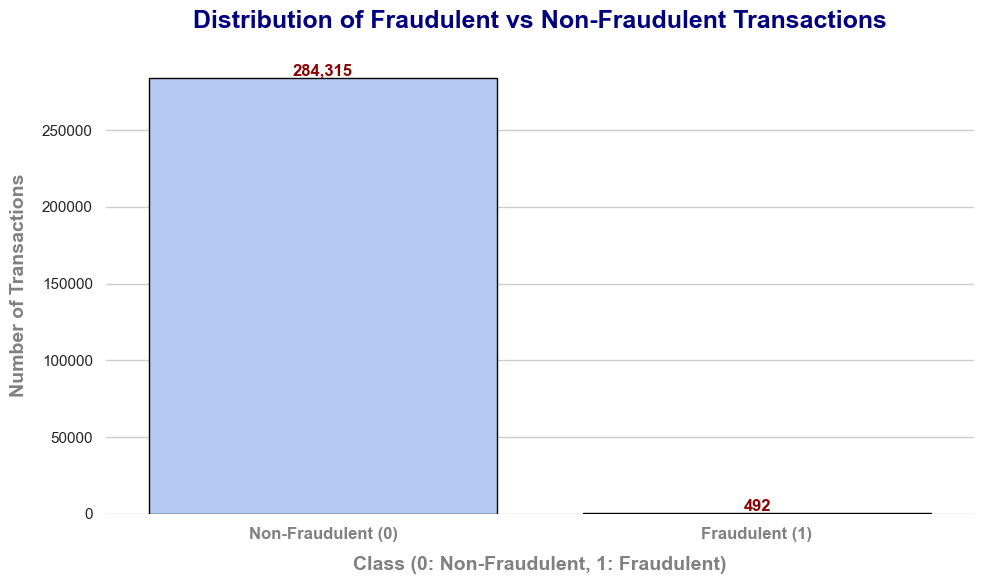

In [10]:
# -------------------------- Distribution of Fraudulent vs Non-Fraudulent Transactions --------------------------

# Set figure size and seaborn style
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

# Countplot for fraudulent vs non-fraudulent transactions
ax = sns.countplot(
    x='Class', 
    data=data, 
    hue='Class',  
    palette="coolwarm", 
    edgecolor='black',
    legend=False  
)

# Add title and axis labels
ax.set_title(
    "Distribution of Fraudulent vs Non-Fraudulent Transactions", 
    fontsize=18, 
    fontweight='bold', 
    color='navy', 
    pad=20
)
ax.set_xlabel(
    "Class (0: Non-Fraudulent, 1: Fraudulent)", 
    fontsize=14, 
    fontweight='semibold', 
    color='gray', 
    labelpad=10
)
ax.set_ylabel(
    "Number of Transactions", 
    fontsize=14, 
    fontweight='semibold', 
    color='gray', 
    labelpad=10
)

# Annotate the bar plot with counts
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        fontsize=12, 
        color='darkred', 
        fontweight='bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

# Customise x-tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(
    ['Non-Fraudulent (0)', 'Fraudulent (1)'], 
    fontsize=12, 
    fontweight='semibold', 
    color='gray'
)

# Remove unnecessary spines for a cleaner look
sns.despine(left=True, bottom=True)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [11]:
# -------------------------- Data Preprocessing: Scaling and Splitting --------------------------

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Handle missing values (if any)
data.fillna(0, inplace=True)
print("\nMissing values after handling:")
print(data.isnull().sum())

# Feature scaling
scaler = StandardScaler()
data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']] = scaler.fit_transform(data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']])

# Split data into features (X) and target (y)
X = data.drop('Class', axis=1)  # Features (all columns except 'Class')
y = data['Class']  # Target variable ('Class')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("\nShapes of the datasets:")
print(f"Training features (X_train): {X_train.shape}")
print(f"Testing features (X_test): {X_test.shape}")
print(f"Training labels (y_train): {y_train.shape}")
print(f"Testing labels (y_test): {y_test.shape}")

# Print confirmation of successful data preprocessing
print("\nData preprocessing completed successfully")


First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -0.694242 -0.044075  1.672773  0.973366 -0.245117  0.347068  0.193679   
1   0.0  0.608496  0.161176  0.109797  0.316523  0.043483 -0.061820 -0.063700   
2   1.0 -0.693500 -0.811578  1.169468  0.268231 -0.364572  1.351454  0.639776   
3   1.0 -0.493325 -0.112169  1.182516 -0.609727 -0.007469  0.936150  0.192071   
4   2.0 -0.591330  0.531541  1.021412  0.284655 -0.295015  0.071999  0.479302   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.082637  0.331128  ... -0.024923  0.382854 -0.176911  0.110507  0.246585   
1  0.071253 -0.232494  ... -0.307377 -0.880077  0.162201 -0.561131  0.320694   
2  0.207373 -1.378675  ...  0.337632  1.063358  1.456320 -1.138092 -0.628537   
3  0.316018 -1.262503  ... -0.147443  0.007267 -0.304777 -1.941027  1.241904   
4 -0.226510  0.744326  ... -0.012839  1.100011 -0.220123  0.233250 -0.395202   

  

### **Step 3: Model Selection and Train Fraud Detection Model (Supervised Learning)**

In [12]:
# -------------------------- Train Fraud Detection Model (Supervised Learning) --------------------------

# Function to train and evaluate supervised learning models
def train_and_evaluate_supervised_model(model, X_train, X_test, y_train, y_test):
    """
    Train and evaluate a supervised learning model (classification).
    
    Parameters:
        model: The supervised learning model to train and evaluate.
        X_train: Training features.
        X_test: Testing features.
        y_train: Training labels.
        y_test: Testing labels.
    
    Returns:
        accuracy, precision, recall, f1: Evaluation metrics.
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print evaluation metrics
    print(f"\n{model.__class__.__name__} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return accuracy, precision, recall, f1

# Logistic Regression
log_reg_model = LogisticRegression(max_iter=2000, solver='liblinear', random_state=42)
print("\nTraining Logistic Regression Model...")
log_reg_metrics = train_and_evaluate_supervised_model(log_reg_model, X_train, X_test, y_train, y_test)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
print("\nTraining Decision Tree Model...")
dt_model_metrics = train_and_evaluate_supervised_model(dt_model, X_train, X_test, y_train, y_test)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
print("\nTraining Random Forest Model...")
rf_model_metrics = train_and_evaluate_supervised_model(rf_model, X_train, X_test, y_train, y_test)

# Confirm that all models have been trained successfully
print("\nAll supervised learning models trained successfully")


Training Logistic Regression Model...

LogisticRegression Model Evaluation:
Accuracy: 0.9987
Precision: 0.6447
Recall: 0.5000
F1 Score: 0.5632

Training Decision Tree Model...

DecisionTreeClassifier Model Evaluation:
Accuracy: 0.9991
Precision: 0.6964
Recall: 0.7959
F1 Score: 0.7429

Training Random Forest Model...

RandomForestClassifier Model Evaluation:
Accuracy: 0.9996
Precision: 0.9740
Recall: 0.7653
F1 Score: 0.8571

All supervised learning models trained successfully


### **Step 4: Train Anomaly Detection Model**

In [13]:
# -------------------------- Train Anomaly Detection Model --------------------------

# Function to train and evaluate anomaly detection models
def train_and_evaluate_anomaly_model(model, X_train, X_test, y_test):
    """
    Train and evaluate an anomaly detection model.
    
    Parameters:
        model: The anomaly detection model to train and evaluate.
        X_train: Training features.
        X_test: Testing features.
        y_test: Testing labels.
    
    Returns:
        report: Classification report for the model.
    """
    # Fit the model on the training data
    model.fit(X_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Convert model output to match y_test labels (1 for normal, 0 for anomaly)
    y_pred = [1 if x == -1 else 0 for x in y_pred]  # Convert anomalies (-1) to 1 (fraud), normal (1) to 0 (non-fraud)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'])
    
    print(f"\n{model.__class__.__name__} Model Evaluation:")
    print(report)
    
    return report

# Isolation Forest
iso_forest_model = IsolationForest(contamination=0.01, random_state=42)
print("\nTraining Isolation Forest Model...")
iso_forest_report = train_and_evaluate_anomaly_model(iso_forest_model, X_train, X_test, y_test)

# One-Class SVM
oc_svm_model = OneClassSVM(nu=0.01, kernel="rbf", gamma="scale")
print("\nTraining One-Class SVM Model...")
oc_svm_report = train_and_evaluate_anomaly_model(oc_svm_model, X_train, X_test, y_test)

# Confirm that anomaly detection models have been trained successfully
print("\nAnomaly detection models trained successfully")


Training Isolation Forest Model...

IsolationForest Model Evaluation:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.99      0.99     56864
       Fraud       0.10      0.63      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.81      0.59     56962
weighted avg       1.00      0.99      0.99     56962


Training One-Class SVM Model...

OneClassSVM Model Evaluation:
              precision    recall  f1-score   support

   Non-Fraud       1.00      0.99      0.99     56864
       Fraud       0.00      0.01      0.00        98

    accuracy                           0.99     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      0.99      0.99     56962


Anomaly detection models trained successfully


In [14]:
# -------------------------- Autoencoder Model --------------------------

# Function to train and evaluate an Autoencoder model
def train_and_evaluate_autoencoder(X_train, X_test, y_test, encoding_dim=14, epochs=50, batch_size=256):
    """
    Train and evaluate an Autoencoder for anomaly detection.
    
    Parameters:
        X_train: Training features.
        X_test: Testing features.
        y_test: Testing labels.
        encoding_dim: Number of neurons in the encoding layer (default: 14).
        epochs: Number of training epochs (default: 50).
        batch_size: Batch size for training (default: 256).
    
    Returns:
        report: Classification report for the Autoencoder.
    """
    # Define the Autoencoder model architecture
    input_layer = Input(shape=(X_train.shape[1],))
    encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l2(1e-5))(input_layer)
    decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)
    
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the Autoencoder
    print("\nTraining Autoencoder Model...")
    autoencoder.fit(
        X_train, X_train,
        epochs=epochs,
        batch_size=batch_size,
        shuffle=True,
        validation_data=(X_test, X_test),
        verbose=1
    )

    # Use the Autoencoder to predict on the test data
    X_test_pred = autoencoder.predict(X_test)

    # Calculate reconstruction error (MSE between original and predicted data)
    mse = np.mean(np.power(X_test - X_test_pred, 2), axis=1)
    
    # Define a threshold for anomaly detection (95th percentile of MSE)
    threshold = np.percentile(mse, 95)

    # Label as anomaly if MSE exceeds the threshold
    y_pred = [1 if e > threshold else 0 for e in mse]

    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'])
    
    print("\nAutoencoder Model Evaluation:")
    print(report)
    
    return report

# Train and evaluate Autoencoder
print("\nTraining and Evaluating Autoencoder Model...")
autoencoder_report = train_and_evaluate_autoencoder(X_train, X_test, y_test)

# Confirm that Autoencoder model has been trained successfully
print("\nAutoencoder model trained successfully")


Training and Evaluating Autoencoder Model...

Training Autoencoder Model...
Epoch 1/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 378204672.0000 - val_loss: 375354976.0000
Epoch 2/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 374434976.0000 - val_loss: 375354720.0000
Epoch 3/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 375181280.0000 - val_loss: 375354720.0000
Epoch 4/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 373998880.0000 - val_loss: 375354720.0000
Epoch 5/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 374336288.0000 - val_loss: 375354720.0000
Epoch 6/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 373964448.0000 - val_loss: 375354720.0000
Epoch 7/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 373569792.0000 - val_loss: 375354720.0000
Epoch 8/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 374340768.0000 - val_loss: 375354720.0000
Epoch 9/50
891/891 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 373899776.0000 - val_loss: 375354720.0000
Epoch

### **Step 5: Ensemble Learning**

In [15]:
# -------------------------- Ensemble Learning --------------------------

# Combine predictions from supervised and anomaly detection models
def ensemble_predictions(supervised_models, anomaly_models, X_test):
    """
    Combine predictions using majority voting.
    
    Parameters:
        supervised_models: List of trained supervised learning models.
        anomaly_models: List of trained anomaly detection models.
        X_test: Testing features.
    
    Returns:
        y_pred_ensemble: Ensemble predictions.
    """
    # Get predictions from supervised models
    supervised_preds = [model.predict(X_test) for model in supervised_models]
    
    # Get predictions from anomaly detection models
    anomaly_preds = []
    for model in anomaly_models:
        if isinstance(model, IsolationForest) or isinstance(model, OneClassSVM):
            preds = model.predict(X_test)
            preds = [1 if x == -1 else 0 for x in preds]  # Convert anomalies (-1) to 1 (fraud)
        else:
            preds = model.predict(X_test)
        anomaly_preds.append(preds)
    
    # Combine all predictions
    all_preds = supervised_preds + anomaly_preds
    
    # Perform majority voting
    y_pred_ensemble = np.round(np.mean(all_preds, axis=0))
    
    return y_pred_ensemble

# List of supervised models
supervised_models = [log_reg_model, rf_model]

# List of anomaly detection models
anomaly_models = [iso_forest_model, oc_svm_model]

# Get ensemble predictions
y_pred_ensemble = ensemble_predictions(supervised_models, anomaly_models, X_test)

# Evaluate ensemble predictions
print("\nEnsemble Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ensemble):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ensemble):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_ensemble):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_ensemble):.4f}")


Ensemble Model Evaluation:
Accuracy: 0.9990
Precision: 0.9574
Recall: 0.4592
F1 Score: 0.6207
ROC-AUC: 0.7296


### **Step 6: Evaluation Metrics**

In [16]:
# -------------------------- Evaluation Metrics --------------------------

# Evaluate ensemble predictions
print("\nEnsemble Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ensemble):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ensemble):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_ensemble):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_ensemble):.4f}")


Ensemble Model Evaluation:
Accuracy: 0.9990
Precision: 0.9574
Recall: 0.4592
F1 Score: 0.6207
ROC-AUC: 0.7296


### **Step 6: Save Trained Models**

In [17]:
# -------------------------- Save Trained Models --------------------------

# Save supervised models
joblib.dump(log_reg_model, 'log_reg_model.pkl')
joblib.dump(rf_model, 'rf_model.pkl')

# Save anomaly detection models
joblib.dump(iso_forest_model, 'iso_forest_model.pkl')
joblib.dump(oc_svm_model, 'oc_svm_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("\nAll models and scaler saved successfully")


All models and scaler saved successfully
